In [1]:
%load_ext autoreload
%autoreload 2

In [114]:
import numpy as np
import numpy.random as nprd
import matplotlib.pyplot as plt
import seaborn as sns
from numbers import Number

from src.function_helper import FunctionHelper, Quadratic
from src.custom_types import Line
from src.optimisation import UnconstrainedOptimizer


In [3]:
Q = np.array([[1, 2], [2, 4]])
p = np.array([1, -1])

test_func = Quadratic(Q=Q, p=p)

test_func_2 = test_func + 10
test_func_3 = test_func * 2

In [4]:
Q

array([[1, 2],
       [2, 4]])

In [6]:
t_range = (-11, 10)
x0 = np.array([0, 0])
direction = np.array([1, 1])
n = 1000
offset = 1
order = 1

In [52]:
line = Line(
    x0=np.array([0, 0]),
    direction=np.array([1, 1])
)

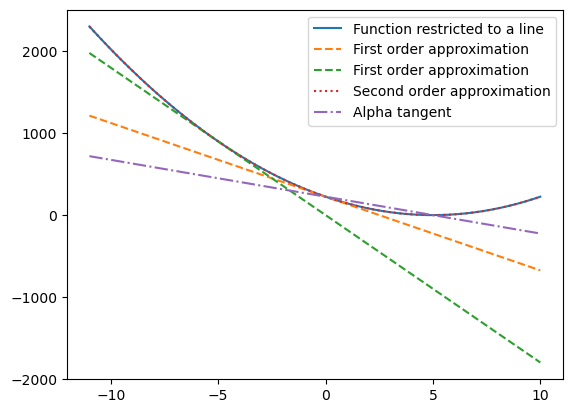

In [51]:
fig, ax = plt.subplots()

line = Line(
    x0=np.array([-5, -5]),
    direction=np.array([1, 1]),
    t_range=(-11, 10),
    n=1000
)

test_func.plot_line(line, ax=ax, label="Function restricted to a line")
test_func.plot_taylor_approximation(line, order=1, ax=ax, linestyle='--', label="First order approximation")
test_func.plot_taylor_approximation(line, order=1, offset=-5, ax=ax, linestyle='--', label="First order approximation")
test_func.plot_taylor_approximation(line, order=2, ax=ax, linestyle='dotted', label="Second order approximation")
test_func.plot_alpha_tangent(line, alpha=0.5, ax=ax, linestyle='-.', label="Alpha tangent")

In [71]:
pb = UnconstrainedOptimizer(test_func, x0=np.array([1, 1]))

In [82]:
pb.line.direction = np.array([-1, -1])

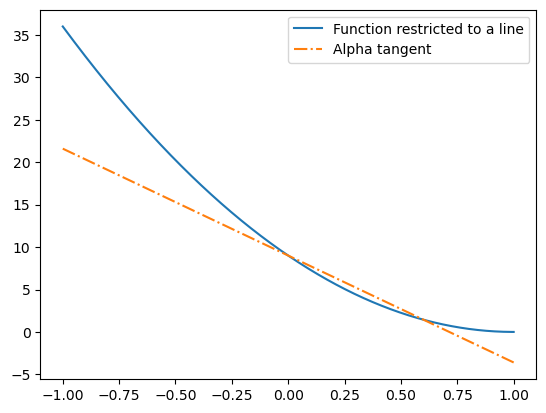

In [112]:
fig, ax = plt.subplots()
t_range = (-1, 1)
pb.func.plot_line(pb.line, t_range=t_range, ax=ax, label="Function restricted to a line")
pb.func.plot_alpha_tangent(pb.line, t_range=t_range, alpha=0.7, ax=ax, linestyle='-.', label="Alpha tangent")

In [106]:
pb.backtracking_line_search(0.6, 0.66)

In [107]:
pb.t

0.66

In [99]:
line_func = pb.line_func()
alpha_tangent = pb.alpha_tangent(0.6)

In [113]:
t = 0.66
line_func(t), alpha_tangent(t)

(1.0404, 1.8719999999999999)

In [555]:
N = 100
Q = nprd.uniform(0, 1, size=(N, N))
p = nprd.uniform(0, 1, size=(N))

In [556]:
mini_hess = lambda x: x.reshape(-1, 1) @ x.reshape(1, -1)
mu = 1e3
# f = lambda x: np.nan_to_num(c.T @ x - np.sum(np.log(b - a @ x)), nan=np.inf)
# g = lambda x: c - a.T @ (1 /(b - a @ x))
# h = lambda x: -a.T @ np.diag(1 /(b - a @ x)**2) @ a
f = lambda x: (np.log(b - a.T @ x) - np.log(b + a.T @ x))
g = lambda x: (a / (b - a.T @ x)) - mu*(a / (b + a.T @ x))
h = lambda x: mu*(mini_hess(a) / (b - a.T @ x)**2) + mu*(mini_hess(a) / (b + a.T @ x)**2)

In [584]:
ex_f = Quadratic(Q, p)
# x0 = nprd.randn(N)
x0 = 10*np.ones(N)

In [585]:
pb = UnconstrainedOptimizer(ex_f, x0, method="gradient")
pb.update_dir()

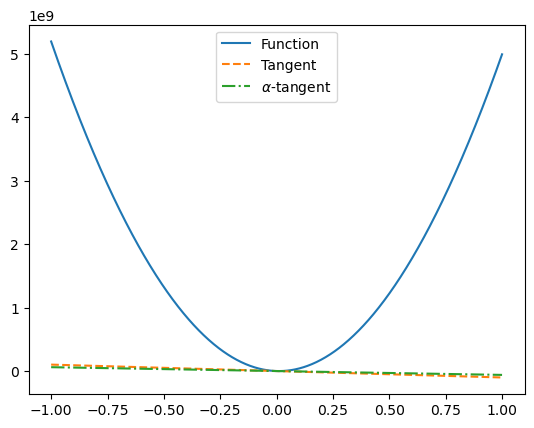

In [586]:
pb.line.t_range = (-1, 1)
pb.func.plot_line(pb.line, label="Function")
pb.func.plot_taylor_approximation(pb.line, label="Tangent", ls='--')
pb.func.plot_alpha_tangent(pb.line, alpha=0.6, label=r"$\alpha$-tangent", ls='-.')

In [587]:
pb.optimise(1e-8, alpha=0.66, beta=0.66, verbose=True)

Step 1:
	 r$\lambda^2$ = 5507.36
	 $y_1$ = 150063.28
	 $y_0 - y_1$ = 352968.87
Step 2:
	 r$\lambda^2$ = 3011.84
	 $y_2$ = 44672.54
	 $y_1 - y_2$ = 105390.74
Step 3:
	 r$\lambda^2$ = 1647.17
	 $y_3$ = 13247.47
	 $y_2 - y_3$ = 31425.06
Step 4:
	 r$\lambda^2$ = 901.02
	 $y_4$ = 3899.97
	 $y_3 - y_4$ = 9347.50
Step 5:
	 r$\lambda^2$ = 493.30
	 $y_5$ = 1131.29
	 $y_4 - y_5$ = 2768.68
Step 6:
	 r$\lambda^2$ = 270.94
	 $y_6$ = 317.03
	 $y_5 - y_6$ = 814.26
Step 7:
	 r$\lambda^2$ = 150.44
	 $y_7$ = 80.11
	 $y_6 - y_7$ = 236.91
Step 8:
	 r$\lambda^2$ = 86.47
	 $y_8$ = 11.97
	 $y_7 - y_8$ = 68.15
Step 9:
	 r$\lambda^2$ = 71.99
	 $y_9$ = 1.72
	 $y_8 - y_9$ = 10.25
Step 10:
	 r$\lambda^2$ = 64.59
	 $y_10$ = -2.85
	 $y_9 - y_10$ = 4.57
Step 11:
	 r$\lambda^2$ = 60.47
	 $y_11$ = -5.23
	 $y_10 - y_11$ = 2.38
Step 12:
	 r$\lambda^2$ = 58.86
	 $y_12$ = -6.13
	 $y_11 - y_12$ = 0.90
Step 13:
	 r$\lambda^2$ = 58.42
	 $y_13$ = -6.37
	 $y_12 - y_13$ = 0.25
Step 14:
	 r$\lambda^2$ = 58.23
	 $y_14$ = -6.48
	 

ValueError: Backtracking line search not converging.

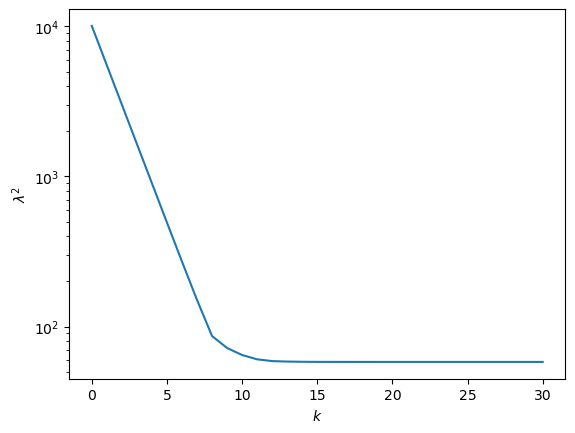

In [588]:
pb.plot_criterion()

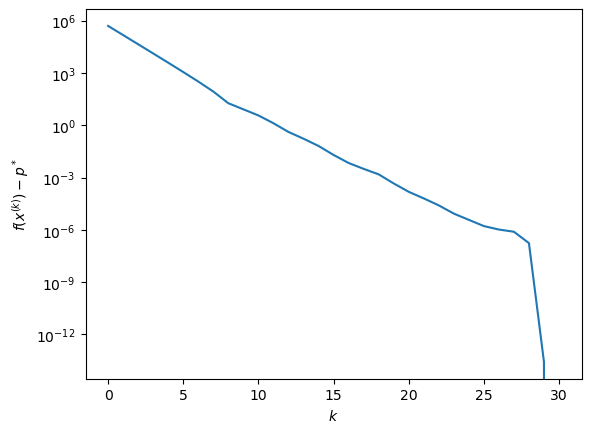

In [589]:
pb.plot_gap()